### AUC-ROC Curve in Machine Learning:
- AUC-ROC Curve is agraph used to check how well a binary classification model works.
- It helps us to understand how well the model separates the positive cases like people with a disease from the negative cases like people without the disease at different threshold level.
- It shows how good the model is at telling the difference between the two classes by plotting.
  1. True Positive Rate (TPR) - how often the model correctly predicts the positive cases also known as sensitivity (or) Recall.
  2. False Positive Rate (FPR) - how often the model incorrectly predicts a negative case as positive.
  3. Specificity - measures the proportion of actual negatives that the model correctly identifies. It is calculated as 1 - FPR.

### How AUC-ROC Works:
- It helps us undertsand how well a classification model distinguishes between two classes.
- Imagine we have 6 data points and out of these.
  1. 3 belongs to the positive class - Class1 for people who have a disease.
  2. 3 belongs to the negative class - Class0 for people who does not have a disease.
- Now the model will give each data point a predicted probaility of belonging to Class 1.
- The AUC measures the model's ability to assign higher predicted probabilities to the positive class than to the negative class.
- Here's how to work -
  1. Randomly choose a pair - Pick one data point from the positive class (Class1) and one data point from the negative class(Class0).
  2. Check if the positive point has a higher predicted probaility - If the model assigns a higher probability to the positive data point than to the negative one for correct ranking.
  3. Repeat for all pairs -  We do this for all possible pairs of positive and negative examples.

### When to Use AUC-ROC :
- AUC-ROC is response when -
  1. The dataset is balanced and the model needs to be evaluated across all thresholds.
  2. False positive and False negative are similiar importance.
- Model Performance with AUC-ROC -
  1. High AUC(close to 1) - The model effectively distinguishes between positive and negative instances.
  2. Low AUC( close to 1) - The model struggles to differentiate between the two classes.
  3. AUC around 0.5 - The model doesn't learn any meaningful patterns. i.e it is doing random guessing.

### Implementation using two different models:
#### 1. Installing Libraries:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

#### 2. Generating data and splitting data
- Using 80-20 split ration, the algorithm creates artifical binary classification data with 20 features, divides it into training and testing sets and assigns a random seed to ensure reproducibility.

In [5]:
X, y = make_classification(n_features=20, n_samples=1000, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 3. Training the different models:
- To Train the Random Forest and Logistic Regression model we use a fixed random seed to get same results every time when we run the code.
- First we train the logistic regression model using the training data.
- Then use the same random seed and training we train a Random Forest model with 100 Trees.

In [7]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### 4. Predictions:
- Using the test and trained Logistic Regression model the code predicts the positive class's probability.
- In a similar manner, using the test and trained RandomForest model to produce projected probabilities for the positive class.

In [8]:
y_pred_logistic = logistic_model.predict_proba(X_test)[:, 1]
y_pred_rf = random_forest_model.predict_proba(X_test)[:, 1]

#### 5. Creating a dataframe:
- Using the test data the code creates a DataFrame called test_df with column labelled "True", "Logistic", "RandomForest" add True labels and predicted probailities from Logistic Regression and Random Forest models.

In [9]:
test_df = pd.DataFrame(
    {'True':y_test, 'Logistic':y_pred_logistic, 'RandomForest':y_pred_rf}
)

#### 6. Plotting ROC Curve for models:
- Plot the ROC curve and compute the AUC for both Logistic Regression and Random Forest.
- The ROC curve compares models based on True Positive Rate vs False positive Rate, while the red dashed line shows random guessing.

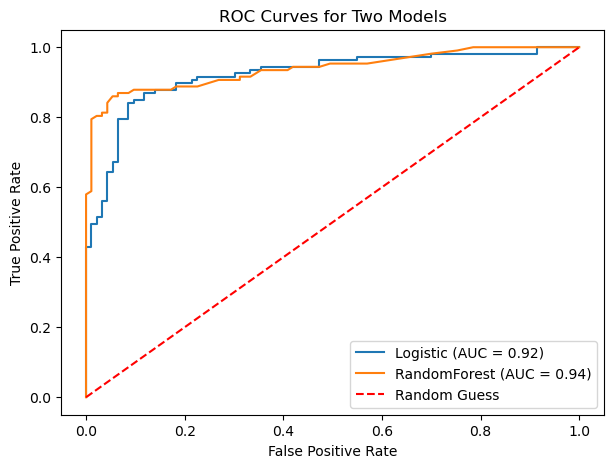

In [10]:
plt.figure(figsize=(7, 5))

for model in ['Logistic', 'RandomForest']:
    fpr, tpr, _ = roc_curve(test_df['True'], test_df[model])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Two Models')
plt.legend()
plt.show()